In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the full dataset
data = pd.read_csv("Assignment20651_House Prices.csv",sep=",")


# Select relevant columns for the analysis
features = ['GarageCars', 'GarageArea', 'OverallQual', 'GrLivArea']
target = 'SalePrice'



# Remove NaN values
data_cleaned = data.dropna()
# Splitting the data into training and test sets
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
data.head()

y = data["SalePrice"]





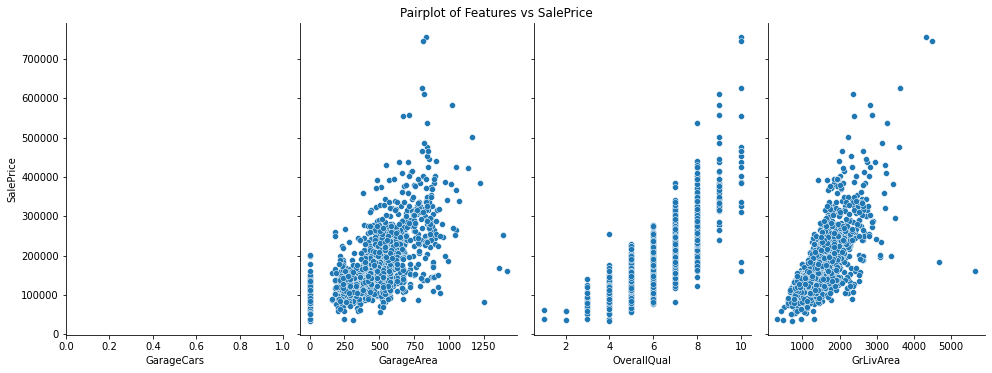

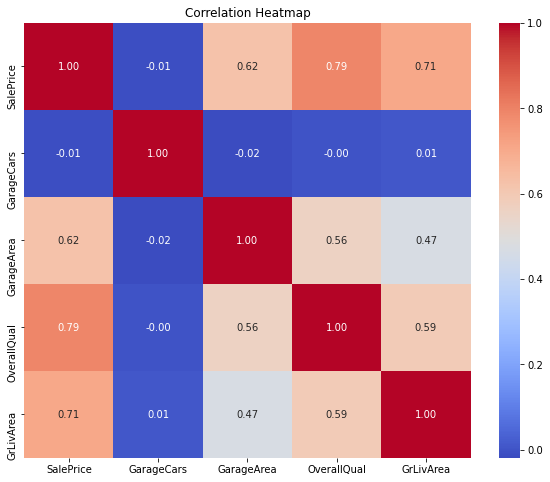

In [2]:
# Pairplot of the features
sns.pairplot(data, x_vars=features, y_vars=target, height=5, aspect=0.7)
plt.suptitle("Pairplot of Features vs SalePrice", y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [3]:
pip install --upgrade tensorflow


  Using cached tensorflow-2.13.1-cp38-cp38-win_amd64.whl (1.9 kB)



ERROR: Could not find a version that satisfies the requirement tensorflow-intel==2.13.1; platform_system == "Windows" (from tensorflow) (from versions: 0.0.1, 2.10.0.dev20220728, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0)
ERROR: No matching distribution found for tensorflow-intel==2.13.1; platform_system == "Windows" (from tensorflow)


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Building the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae}")


ImportError: cannot import name 'experimental_functions_run_eagerly' from 'tensorflow.python.eager.def_function' (C:\Users\Sci-hub\anaconda3\lib\site-packages\tensorflow\python\eager\def_function.py)

In [ ]:
import numpy as np

# Example: Varying GarageArea while keeping other variables constant
garage_area_range = np.linspace(X['GarageArea'].min(), X['GarageArea'].max(), 100)
predicted_prices = []

for area in garage_area_range:
    sample_input = np.array([[2, area, 7, 2200]])  # Example input with other variables constant
    sample_input_scaled = scaler.transform(sample_input)
    predicted_price = model.predict(sample_input_scaled)
    predicted_prices.append(predicted_price[0][0])

plt.figure(figsize=(10, 6))
plt.plot(garage_area_range, predicted_prices, label='Predicted SalePrice')
plt.xlabel('GarageArea')
plt.ylabel('Predicted SalePrice')
plt.title('Impact of Garage Area on Predicted Sale Price')
plt.legend()
plt.show()


In [ ]:
# Forecasting the sale price for the given input
specific_input = np.array([[2, 600, 7, 2200]])
specific_input_scaled = scaler.transform(specific_input)
forecasted_price = model.predict(specific_input_scaled)
print(f"Forecasted Sale Price: ${forecasted_price[0][0]:,.2f}")
